# The CMD plot in the paper.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns

plotpar = {'axes.labelsize': 30,
           'font.size': 22,
           'legend.fontsize': 10,
           'xtick.labelsize': 30,
           'ytick.labelsize': 30,
           'text.usetex': True}
plt.rcParams.update(plotpar)

Load the data file.

In [3]:
df0 = pd.read_csv("../kepler_kinematics/gaia_kepler_lamost.csv")

In [4]:
ml = np.isfinite(df0.stellar_rv.values)
print(sum(ml), "stars with LAMOST RVs after cuts")
mg = (df0.radial_velocity.values != 0)
mg &= np.isfinite(df0.radial_velocity.values)
print(sum(mg), "stars with Gaia RVs after cuts")
ma = np.isfinite(df0.OBSVHELIO_AVG.values)
print(sum(ma), "stars with APOGEE RVs after cuts")
m = np.isfinite(df0.rv.values)
print(sum(m), "stars with RVs after cuts")
print(len(df0), "stars")

38581 stars with LAMOST RVs after cuts
29512 stars with Gaia RVs after cuts
21267 stars with APOGEE RVs after cuts
58270 stars with RVs after cuts
185223 stars


In [5]:
print(len(df0))
f = np.isfinite(df0.color_teffs.values) & (df0.color_teffs.values > 2000) & (df0.color_teffs.values < 10000)
df = df0.iloc[f]
print("removing stars with weird teffs")
print(len(df))

185223
removing stars with weird teffs
183919


In [6]:
m = np.isfinite(df.rv.values)

In [7]:
def abs_mag(m, D):
    return 5 + m - 5*np.log10(D)

M_G = abs_mag(df.phot_g_mean_mag.values, df.r_est.values)

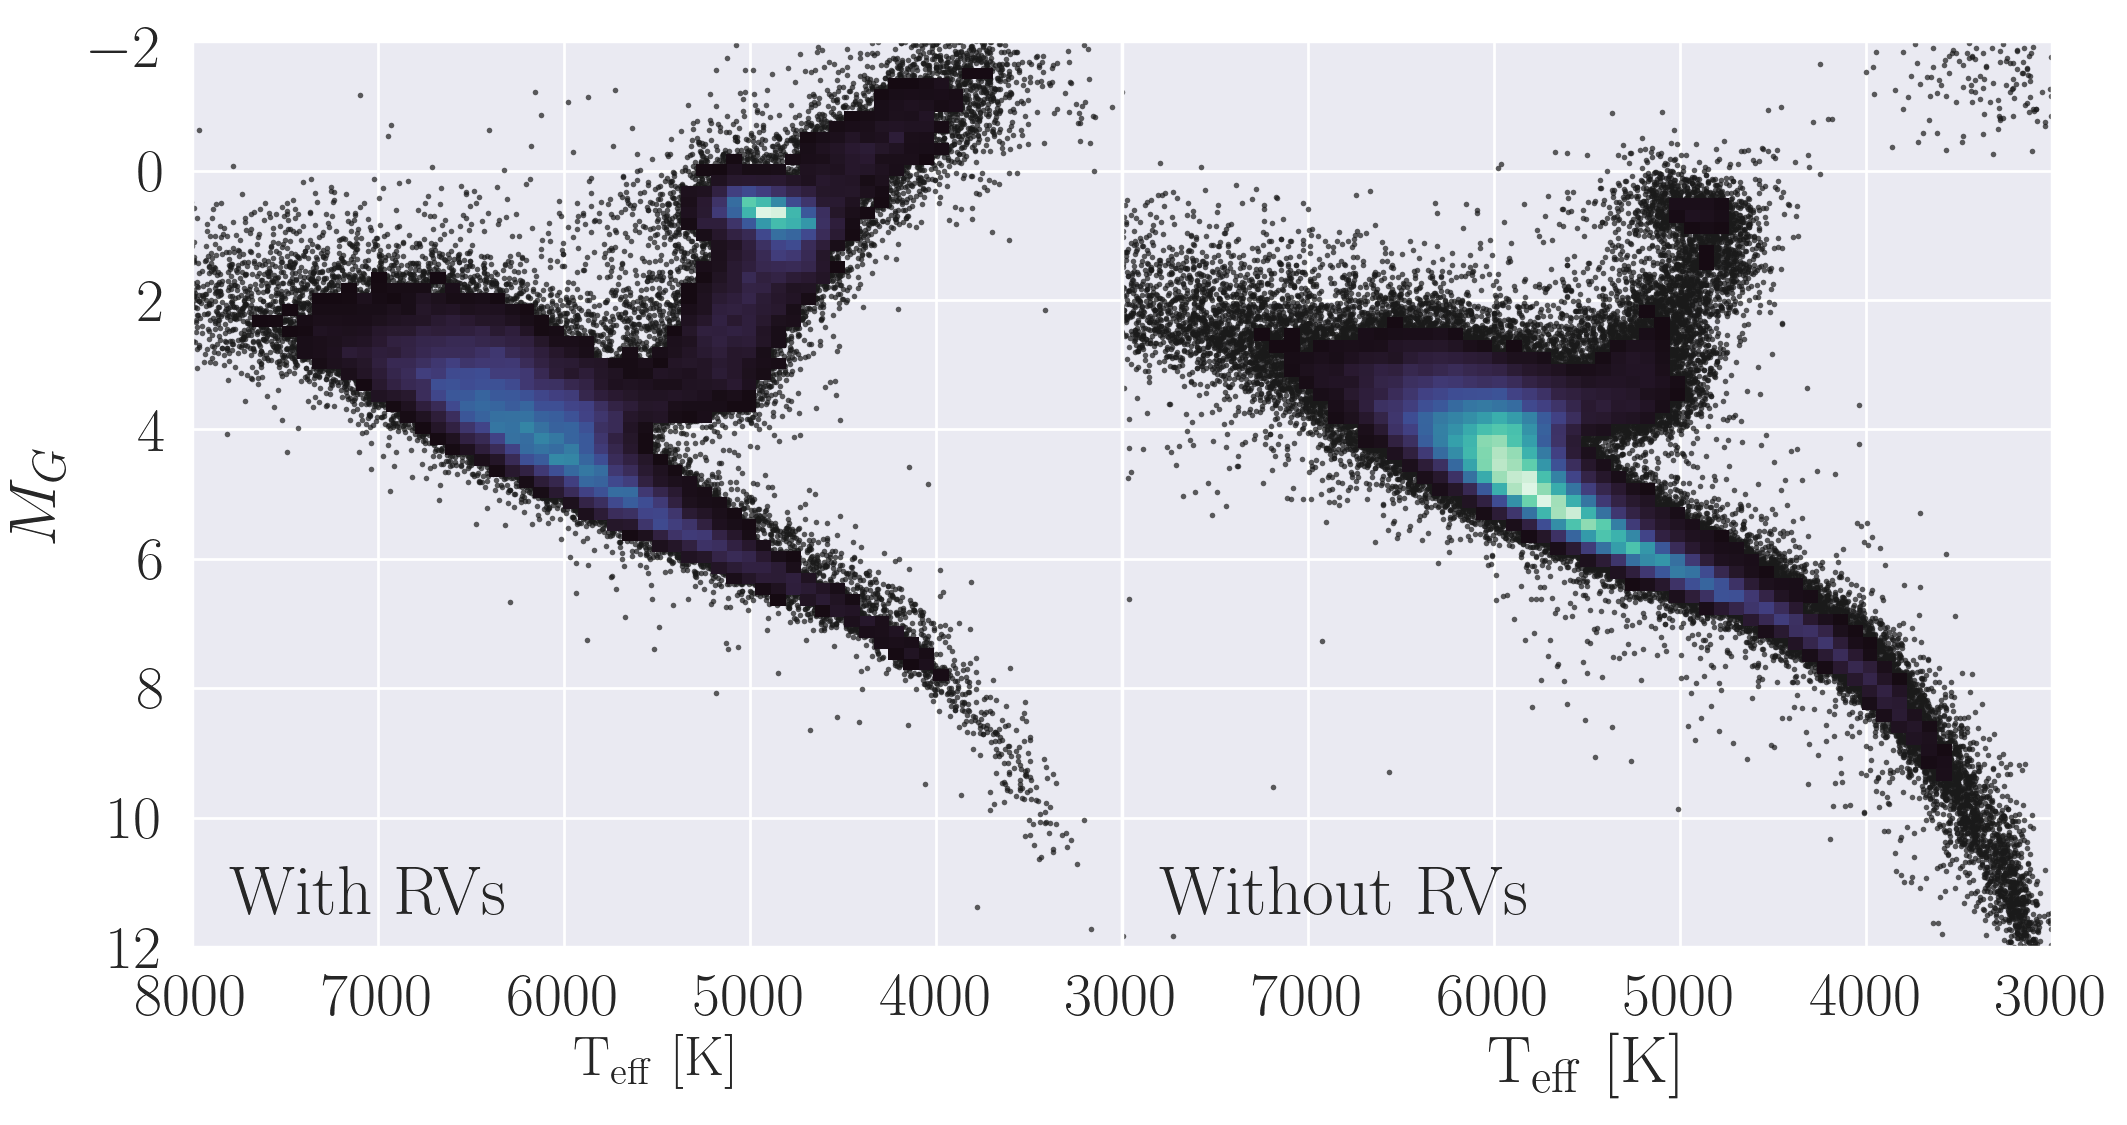

In [9]:
fig = plt.figure(figsize=(12, 6), dpi=200)
ax0 = fig.add_subplot(121)
ax0.plot(df.color_teffs.values[m], M_G[m], "k.", ms=4, mec="none", zorder=1, alpha=.7, rasterized=True)
sns.histplot(x=df.color_teffs.values[m], y=M_G[m], bins=100, pthresh=.1,
             cmap="mako", zorder=2)
ax0.text(7800, 11.5, "$\mathrm{With~RVs}$", fontsize=25)
ax0.set_xlim(8000, 3000)
ax0.set_ylim(12, -2)
ax0.set_ylabel("$M_G$")#, fontsize=20)
ax0.set_xlabel("$\mathrm{T_{eff}~[K]}$", fontsize=20)
sns.set(font_scale = 2)

ax1 = fig.add_subplot(122)
ax1.plot(df.color_teffs.values[~m], M_G[~m], "k.", ms=4, mec="none", zorder=1, alpha=.7, rasterized=True)
sns.histplot(x=df.color_teffs.values[~m], y=M_G[~m], bins=100, pthresh=.1,
             cmap="mako", zorder=2)
ax1.set_xlim(8000, 3000)
ax1.set_ylim(12, -2)
ax1.set_yticklabels([])
ax1.set_xticklabels(["$3000$", "$4000$", "$5000$", "$6000$", "$7000$"])
ax1.set_xlabel("$\mathrm{T_{eff}~[K]}$")#, fontsize=20)
ax1.text(7800, 11.5, "$\mathrm{Without~RVs}$", fontsize=25)
sns.set(font_scale = 2)

plt.subplots_adjust(wspace=0.)

# plt.savefig("../plots/CMD")
# plt.savefig("../paper/CMD.pdf")

Look at the selection functions of the three surveys.

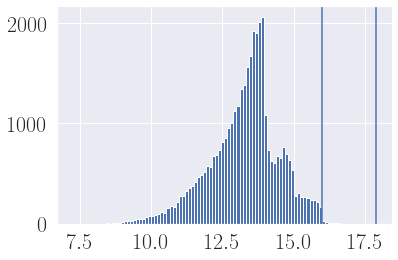

In [32]:
plt.hist(df0.phot_g_mean_mag.values[ml], 100);
plt.axvline(max(df0.phot_g_mean_mag.values[ml]))
plt.axvline(16)

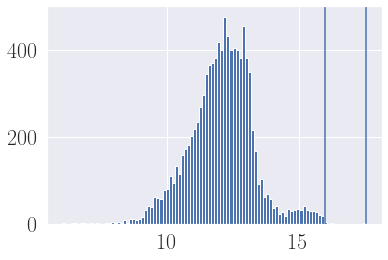

In [34]:
plt.hist(df0.phot_g_mean_mag.values[ma], 100);
plt.axvline(max(df0.phot_g_mean_mag.values[ma]))
plt.axvline(16)

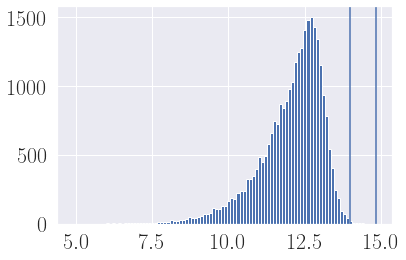

In [35]:
plt.hist(df0.phot_g_mean_mag.values[mg], 100);
plt.axvline(max(df0.phot_g_mean_mag.values[mg]))
plt.axvline(14)